In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import warnings

In [3]:
df = pd.read_csv("Dataset/students.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
x = df.drop(['math_score'],axis=1)  #independent features
y = df['math_score'] # Dependent Feature

WE have 4 Categorical Features and want to convert categorical features into numerical features that's why we use OneHotCoders

In [6]:
num_feature = x.select_dtypes(exclude="object").columns
cat_feature = x.select_dtypes(include="object").columns


from sklearn.preprocessing import StandardScaler, OneHotEncoder #OneHotEncoder converts categories into numeric binary representations. StandardScaler = To Scale Down the feature  
from sklearn.compose import ColumnTransformer # Combines multiple preprocessing steps into a single object. You can preprocess numerical and categorical features differently.and transforming columns

#Normalize numerical data using StandardScaler.
#Encode categorical data using OneHotEncoder.

Normalize_numerical_data = StandardScaler()
Encode_categorical_data = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("One Hot Encoder" , Encode_categorical_data ,  cat_feature),
        ("Standard Scaler" , Normalize_numerical_data , num_feature),
    ]
)

In [7]:
preprocessor

ColumnTransformer(transformers=[('One Hot Encoder', OneHotEncoder(),
                                 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')),
                                ('Standard Scaler', StandardScaler(),
                                 Index(['reading_score', 'writing_score'], dtype='object'))])

In [8]:
X = preprocessor.fit_transform(x)
print(X)

[[ 1.          0.          0.         ...  1.          0.19399858
   0.39149181]
 [ 1.          0.          0.         ...  0.          1.42747598
   1.31326868]
 [ 1.          0.          0.         ...  1.          1.77010859
   1.64247471]
 ...
 [ 1.          0.          0.         ...  0.          0.12547206
  -0.20107904]
 [ 1.          0.          0.         ...  0.          0.60515772
   0.58901542]
 [ 1.          0.          0.         ...  1.          1.15336989
   1.18158627]]


In [9]:
X.shape

(1000, 19)

In [10]:
# Split Data Into Train And Test Data

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)
X_train.shape , X_test.shape

((800, 19), (200, 19))

Create Evaluate Function to give all metrics after model Training

In [11]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_scores = r2_score(true,predicted)

    return mae , rmse , r2_scores 

In [12]:
models = {
    "LinearRegression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "KNeighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree Regressor" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "AdaBoost Regressor" : AdaBoostRegressor(),
    "CatBoost Regressor" : CatBoostRegressor(verbose=True)
}

model_list = []
r2_score_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_predict)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_predict)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("model Performance for training data")

    print(f"mean_absolute_error = {model_train_mae:.2f}")
    print(f"RMSE = {model_train_rmse:.2f}")
    print(f"r2_score= {model_train_r2:.2f}")

    print("="*30)

    print("model Performance for test data")

    print(f"mean_absolute_error = {model_test_mae:.2f}")
    print(f"RMSE = {model_test_rmse:.2f}")
    print(f"r2_score = {model_test_r2:.2f}\n")

    r2_score_list.append(model_test_r2)


LinearRegression
model Performance for training data
mean_absolute_error = 4.27
RMSE = 5.32
r2_score= 0.87
model Performance for test data
mean_absolute_error = 4.21
RMSE = 5.39
r2_score = 0.88

Lasso
model Performance for training data
mean_absolute_error = 5.21
RMSE = 6.59
r2_score= 0.81
model Performance for test data
mean_absolute_error = 5.16
RMSE = 6.52
r2_score = 0.83

Ridge
model Performance for training data
mean_absolute_error = 4.26
RMSE = 5.32
r2_score= 0.87
model Performance for test data
mean_absolute_error = 4.21
RMSE = 5.39
r2_score = 0.88

KNeighbors Regressor
model Performance for training data
mean_absolute_error = 4.52
RMSE = 5.71
r2_score= 0.86
model Performance for test data
mean_absolute_error = 5.63
RMSE = 7.26
r2_score = 0.78

Decision Tree Regressor
model Performance for training data
mean_absolute_error = 0.02
RMSE = 0.28
r2_score= 1.00
model Performance for test data
mean_absolute_error = 6.50
RMSE = 8.26
r2_score = 0.72

Random Forest Regressor
model Perfor

In [13]:
pd.DataFrame(list(zip(model_list,r2_score_list)),columns=['Model Name','R2 Score']).sort_values(by=['R2 Score'],ascending=False)

# zip is use to iterator over couple of variables.But we have to convert it into tuple or list form for output.   syntax = zip(*iterator)

,Model Name,R2 Score
2,Ridge,0.880593
0,LinearRegression,0.880433
8,CatBoost Regressor,0.851632
5,Random Forest Regressor,0.851076
7,AdaBoost Regressor,0.849526
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,KNeighbors Regressor,0.783681
4,Decision Tree Regressor,0.719917


In [14]:
linear = LinearRegression(fit_intercept=True)
linear_model = linear.fit(X_train,y_train)
y_pred = linear_model.predict(X_test)
r2_scores = r2_score(y_test,y_pred)*100
print(f"Accuracy of model is {r2_scores:.2f}")

Accuracy of model is 88.04


Text(0, 0.5, 'predicted')

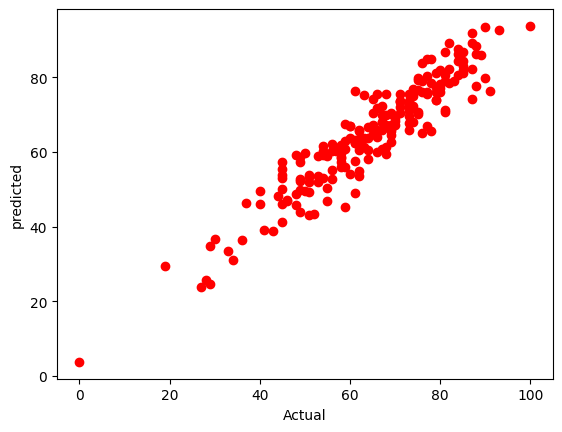

In [15]:
plt.scatter(y_test,y_pred,color = "red")
plt.xlabel("Actual")
plt.ylabel("predicted")

<Axes: xlabel='math_score'>

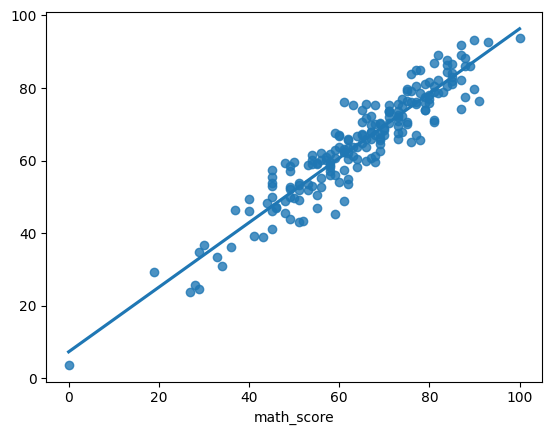

In [16]:
sns.regplot(x=y_test,y=y_pred,ci=None)

In [17]:
pd.DataFrame(zip(y_test,y_pred,y_test-y_pred),columns=["Actual Values","Predicted Values", "Difference"])

,Actual Values,Predicted Values,Difference
0,91,76.387970,14.612030
1,53,58.885970,-5.885970
2,80,76.990265,3.009735
3,74,76.851804,-2.851804
4,84,87.627378,-3.627378
...,...,...,...
195,52,43.409149,8.590851
196,62,62.152214,-0.152214
197,74,67.888395,6.111605
198,65,67.022287,-2.022287
